<a href="https://colab.research.google.com/github/JoyUgoyah/LithoFacies-Classification-using-Machine-Learning/blob/main/LithoFacies_Classification_using_Machine_Learning_Cyphercrescent_Test_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Test Project - Litho Facies Classification

##Objective

This notebook uses machine learning written in python language to train different algorithms (in the ScikitLearn and TensorFlow framework) that classify LithoFacies from well log data with the aim of determining the stratigraphy present at a given depth of exploration in a subsurface area.

In [2]:
# Import basic libraries for data wrangling, analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data to a pandas DataFrame
file_path = "https://raw.githubusercontent.com/seg/2016-ml-contest/master/training_data.csv"
facies_data = pd.read_csv(file_path)

In [ ]:
# View a few points in the data set
facies_data.sample(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
2322,9,B2 LM,Recruit F9,3013.0,32.188,0.821,-1.42,9.721,4.961,2,0.600
283,3,B5 SH,SHRIMPLIN,2934.5,100.170,0.391,11.60,18.110,3.200,1,0.471
2374,3,A1 SH,NEWBY,2830.5,67.330,0.719,7.30,10.750,3.400,1,0.791
424,5,C LM,SHRIMPLIN,3005.0,52.630,0.942,7.60,7.840,5.000,2,0.461
1294,2,C SH,LUKE G U,2797.5,72.140,0.549,13.90,13.050,3.400,1,0.439
312,3,C SH,SHRIMPLIN,2949.0,127.250,0.519,7.50,17.585,3.600,1,0.982
2518,2,B1 SH,NEWBY,2902.5,63.970,0.632,0.40,19.400,3.100,1,0.097
873,6,C LM,SHANKLE,2985.0,39.550,0.792,1.90,8.035,3.300,2,0.672
931,2,A1 SH,LUKE G U,2616.0,73.650,0.675,6.30,10.650,3.500,1,0.792
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.20,12.565,4.100,1,0.979


The data set contains log data from nine wells in the Panoma Field (Reservior: Council Grove gas reservoir, Southwest Kansas). The log data have been labeled with the corresponding facies type. This makes it a `Supervised Learning` problem since the prediction target (Facies) is included in the dataset for model training.

In [ ]:
# Get the dimension of the data points in the dataset
facies_data.shape

(3232, 11)

In [ ]:
# See information on data set
facies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


The data set is made up of 11 columns with `3232 data points` (referred to as instances going forward). The columns are described as follows:

`Facies`: This is the target of the Machine Learning (ML) prediction. It is of integer data type because the different facies classes present in this dataset have been represented with numbers. 

The rest of the columns are potential training Features. Their suitability for model training will be determined based on observation after exploring and analyzing the data set.

`Formation`: The formation from which the data point was recorded. It is of object data type which has high memory usage and can slow down data processing during model training and inference.

`Well Name`: Indicates the well from which each data point was recorded. Also of Object data type.

`Depth`: The data points were measured at half-foot depth intervals

`GR`, `ILD_log10`, `DeltaPHI`, `PHIND`, `PE`: Represent wireline log measurements - gamma ray, resistivity logging,  neutron-density porosity, average neutron-density porosity, and photoelectric effect respectively.

`NM_M` and `RELPOS`: These are geologic constraining variables.

From information in the literature published [here](https://library.seg.org/doi/10.1190/tle35100906.1), the five wireline log measurements and two geologic constraining variables are the parameters usually required for classifying Facies through manual human analysis. 

In [ ]:
# Check memory usage
facies_data.memory_usage()

Index          128
Facies       25856
Formation    25856
Well Name    25856
Depth        25856
GR           25856
ILD_log10    25856
DeltaPHI     25856
PHIND        25856
PE           25856
NM_M         25856
RELPOS       25856
dtype: int64

The memory usage of each column is measured in bytes. For this dataset, the total memory usage is 277.9+ KB, relatively small when compared to large datasets that take a lot of time to train. Training of algorithms on this dataset will be relatively fast (even with the neural networks).

In [ ]:
facies_data['Well Name'].unique()

['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (8, object): ['CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY', 'NOLAN', 'Recruit F9',
                         'SHANKLE', 'SHRIMPLIN']

In [ ]:
facies_data['Formation'].unique()

['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', ..., 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM']
Length: 14
Categories (14, object): ['A1 LM', 'A1 SH', 'B1 LM', 'B1 SH', ..., 'B5 LM', 'B5 SH', 'C LM', 'C SH']

In [ ]:
facies_data['Facies'].unique()

array([3, 2, 8, 6, 7, 4, 5, 9, 1], dtype=object)

There are 9 classes in the Target label `Facies` column. The Facies classes represented with the numbers 1-9 are ennumerated below:

| Target Label | Facies Name                                 | Adjacent Facies |
|:------------:|:-------------------------------------------:|:---------------:|
| 1            | Nonmarine sandstone (SS)                    | 2               |
| 2            | Nonmarine coarse siltstone [CSiS]           | 1,3             |
| 3            | Nonmarine fine siltstone [FSiS]             | 2               |
| 4            | Marine siltstone and shale [SiSh]           | 5               |
| 5            | Mudstone (limestone) [MS]                   | 4,6             |
| 6            | Wackestone (limestone) [WS]                 | 5,7             |
| 7            | Dolomite [D]                                | 6,8             |
| 8            | Packstone-grainstone (limestone) [PS]       | 6,7,9           |
| 9            | Phylloid-algal bafflestone (limestone) [BS] | 7,8             |
|              |                                             |                 |


In the formation the facies aren't discrete but rather blend into one another gradually. Some have adjacent facies that are rather close as shown in the table above. Mislabeling within these neighboring facies can be expected to occur and will be taken into consideration during model training.

## Exploratory Data Analysis (EDA)

In [ ]:
# Check for missing values
facies_data.isnull().sum()

Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64

No missing data points.

In [ ]:
# Get a statistical description of numerical data
facies_data.describe()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


The statistical description above shows that the features of the data set are not normally distributed (i.e. Gausian distribution with mean=0 & standard deviation=1). This may affect model training negatively as the deep learning and logistic regression algorithms to be used in this notebook require the data to be normally distributed. I'll do a visualization of the data distribution confirm.

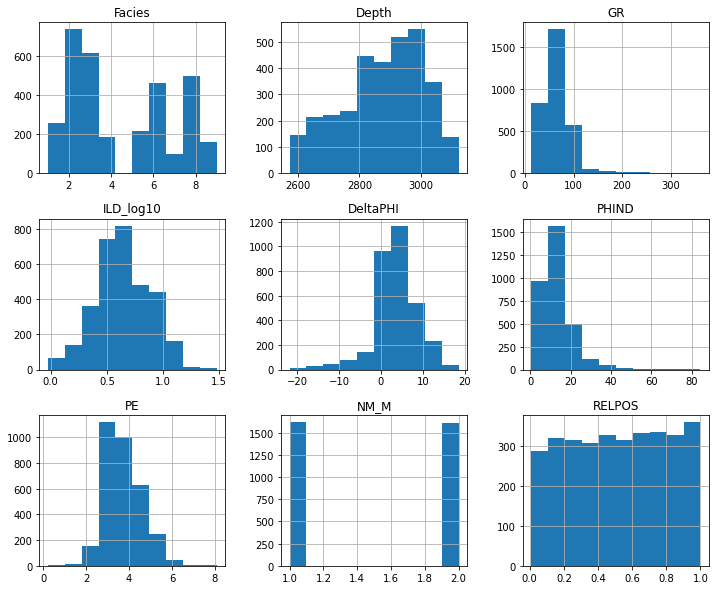

In [ ]:
facies_data.hist(figsize=(12, 10), bins=50);

plt.show()

The distribution plots of the different features shows that the data points are not normally ditributed and will therefore be normalized in the data preprocessing section.

In [ ]:
# Get Description of the categorical data
facies_data.describe(include=object)

,Facies,Formation,Well Name
count,3232,3232,3232
unique,9,14,8
top,2,C LM,CROSS H CATTLE
freq,738,483,501


The dataset contains 9 Facie classes, 14 formations, and 8 wells. 

class imbalance in the target vector (Facies) can lead poor training accuracy. Let's check for target class imbalance.

In [ ]:
# Color coding the target classes
facies_names = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS'] # map facies names to the numbers(classes)
facies_colours = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_colour_map = {}   
for i, label in enumerate(facies_names):
    facies_colour_map[label] = facies_colours[i]

facies_colour_map

{'SS': '#F4D03F',
 'CSiS': '#F5B041',
 'FSiS': '#DC7633',
 'SiSh': '#6E2C00',
 'MS': '#1B4F72',
 'WS': '#2E86C1',
 'D': '#AED6F1',
 'PS': '#A569BD',
 'BS': '#196F3D'}

ValueError: ignored

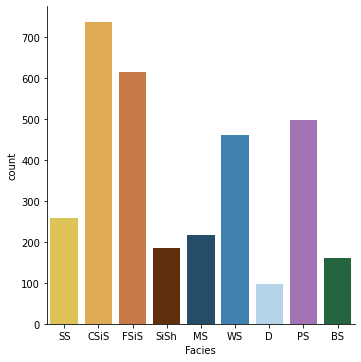

In [ ]:
sns.catplot(data=facies_data.all(), x=x, kind="count", palette=facies_colours, order=facies_names);

The classes are highly imbalanced. To intepret class imbalance during model training, the data distribution in % of the train/test/blind set per target class will be set not too far apart.

In [ ]:
facies_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [ ]:
# Plot the log data and facies vs Depth on the same axes per well
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
facies_data.loc[:,'FaciesLabels'] = facies_data.apply(lambda row: label_facies(row, facies_labels), axis=1)


def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)


"""for wellId in well_names_validate:
    make_facies_log_plot( test_data[test_data['Well Name'] == wellId], facies_colors=facies_colors, y_test=y_test, wellId=wellId)"""

"for wellId in well_names_validate:\n    make_facies_log_plot( test_data[test_data['Well Name'] == wellId], facies_colors=facies_colors, y_test=y_test, wellId=wellId)"

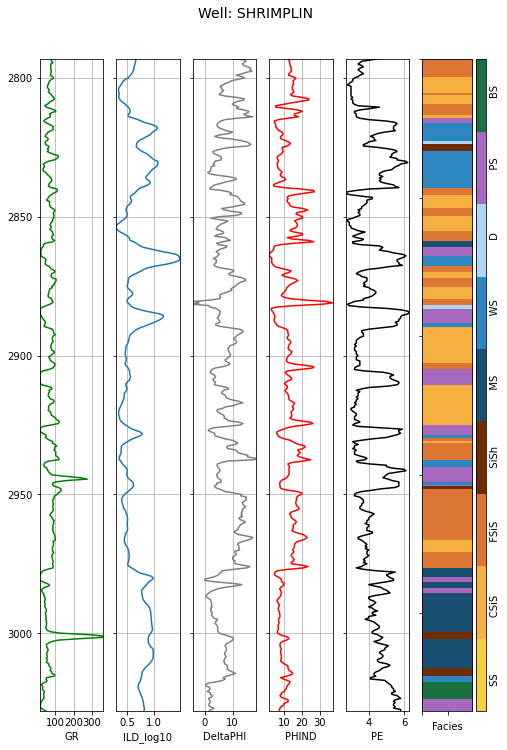

In [ ]:
make_facies_log_plot(
    facies_data[facies_data['Well Name'] == 'SHRIMPLIN'],
    facies_colours)

This is what a plot of the wireline log measurements for the Facies determined at various depths look like. The correlation plot below the degree of correlation amongst the different numerical features and target.

In [ ]:
facies_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,FSiS


The `FaciesLabels` column was added in the Wire log measurement plotting function. It is not needed further on in the notebook so it will be dropped.

In [ ]:
facies_data = facies_data.drop('FaciesLabels', axis=1)
facies_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [ ]:
# Get the data correlation
correlation = facies_data.corr()

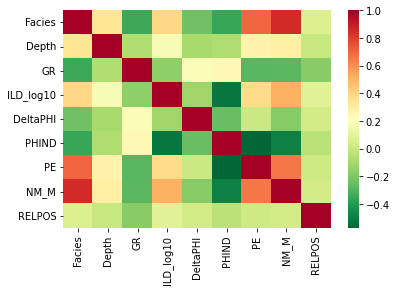

In [ ]:
# Correlation Plot
sns.heatmap(correlation, cmap='RdYlGn_r');

`Facies` has high positive correlation with `NM_M` & `PE` and a high negative correlation with `PHIND`, `GR`, & `DeltaPHI`. This makes them eligible as training features. 

`Facies` has a low negative correlation with `RELPOS`, moderate positive correlation with `ILD_log10` and a low positive correlation with `Depth`. Since the correlations are greater than zero these features will also be used training in the classification model.

No colinearity is observed between the features. Below we see the behaviour of the relationships between the variables.

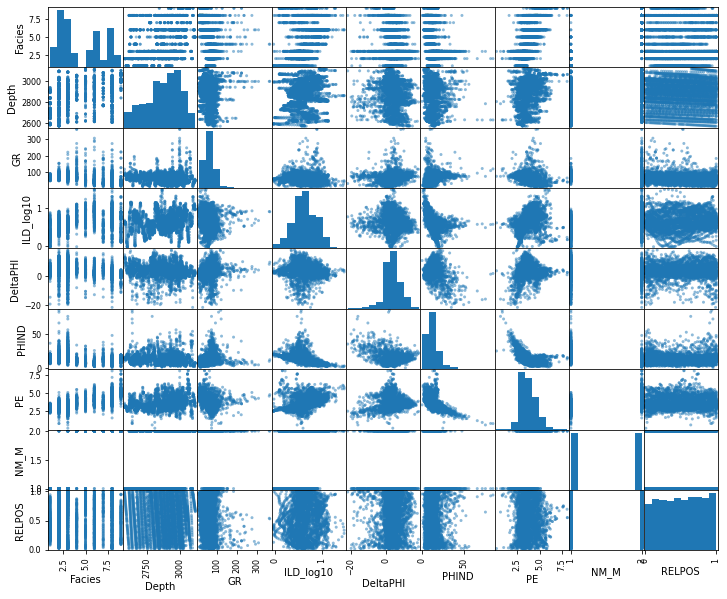

In [ ]:
# Pair-plot all the variables in a scatter matrix 
pd.plotting.scatter_matrix(facies_data, figsize=(12,10));

The features all show variations for the different target (Facies) classes. `PE` for example appears to record higher values as the classes go from 1 to 9. Knowlegde of this relationship can be helpful when the model performance is to be improved. i.e if the model prediction is higher or lower than expected.

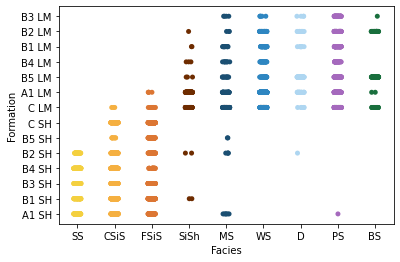

In [ ]:
# Scatter plot `Formation` and `Well Name` vs `Facies`
sns.stripplot(data=facies_data, x=x, y="Formation", palette=facies_colours, order=facies_names)

The target class vary with the `Formation`. B3 LM formation for example has no `SS` class `Facie`, it has `MS` to `BS` classes. Formation C SH has only the `CSiS` & `FSiS`  Facie classes. This makes it import for the model to be trained on the `Formation` data. Since it is of categorical data type, the data will be encoded before being fed to the training algorithm.

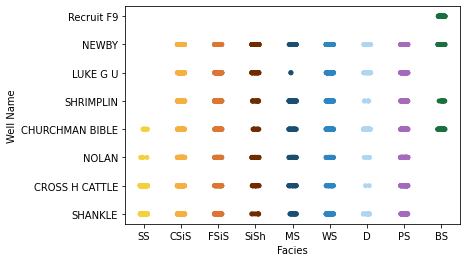

In [ ]:
# Scatter plot `Formation` and `Well Name` vs `Facies`
sns.stripplot(data=facies_data, x=x, y="Well Name", palette=facies_colours, order=facies_names)

`BS` Facies class is only found in wells 'Recruit F9', 'NEWBY', 'SHRIMPLIN' & 'CHURCHMAN BIBLE'. The `Well Name` play a role in the class of `Facies ` present and should therefore be a part of the training data. As a categorical data, it will be encoded before being fed to the training.

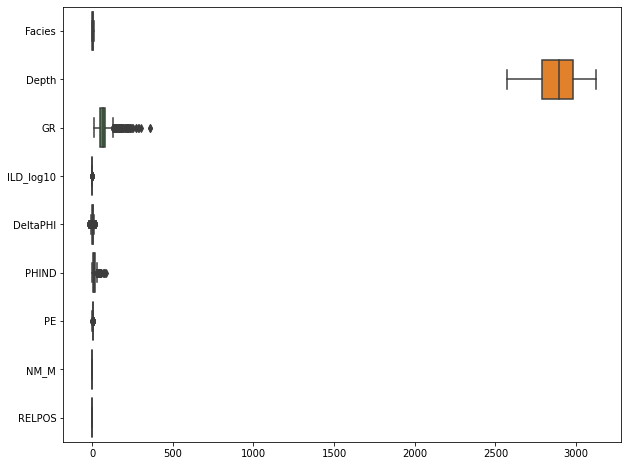

In [ ]:
# Boxplots to check for outliers

fig, ax = plt.subplots(figsize=(10,8))

sns.boxplot(data=facies_data, ax=ax, orient='h')

plt.show()

The box plot above shows that the data features fall within different ranges of values. There also a lot of columns with noisy data falling outside the top percentile of the data range. These conditions of the data set call for normalization as opposed to standardization of the data.

##Data Preprocessing

Before heading on to preprocess the data, I will assign `feature` and `target` variables from the original data set so that I can benchmark the performance of the model when trained with the original version of the data compared to when it is trained with preprocessed versions of the data.

I will also assign `feature` and `target` variables for the one-hot encoded version of the data and the encoded & normalized version of the data in this section.

In [ ]:
# Assign feature & target vectors

X_original = facies_data.drop(["Facies", "Well Name", "Formation"], axis=1)
y_original = facies_data["Facies"]

### One-hot Encode categorical data

I chose the one-hot method of encoding categorical data because the categorical data points were non-hierachial and independent of each other.

In [4]:
# encode data
facies_data_encoded = pd.get_dummies(facies_data)

facies_data_encoded.head()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Formation_A1 LM,...,Formation_C LM,Formation_C SH,Well Name_CHURCHMAN BIBLE,Well Name_CROSS H CATTLE,Well Name_LUKE G U,Well Name_NEWBY,Well Name_NOLAN,Well Name_Recruit F9,Well Name_SHANKLE,Well Name_SHRIMPLIN
0,3,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,0,...,0,0,0,0,0,0,0,0,0,1
1,3,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,0,...,0,0,0,0,0,0,0,0,0,1
3,3,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,0,...,0,0,0,0,0,0,0,0,0,1
4,3,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,0,...,0,0,0,0,0,0,0,0,0,1


I will set aside one well to use to validate the performance of the model after training and testing. The predicted facies of this well will be visualized to show what the model's predictions look like in comparison to the through facies.

In [5]:
# Data points from one of the wells in the data set will be used for model validation (Blind data)

blind = facies_data_encoded[facies_data_encoded['Well Name_SHANKLE'] == 1]
facies_data_encoded = facies_data_encoded[facies_data_encoded['Well Name_SHANKLE'] != 1]
blind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 471 to 919
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Facies                     449 non-null    int64  
 1   Depth                      449 non-null    float64
 2   GR                         449 non-null    float64
 3   ILD_log10                  449 non-null    float64
 4   DeltaPHI                   449 non-null    float64
 5   PHIND                      449 non-null    float64
 6   PE                         449 non-null    float64
 7   NM_M                       449 non-null    int64  
 8   RELPOS                     449 non-null    float64
 9   Formation_A1 LM            449 non-null    uint8  
 10  Formation_A1 SH            449 non-null    uint8  
 11  Formation_B1 LM            449 non-null    uint8  
 12  Formation_B1 SH            449 non-null    uint8  
 13  Formation_B2 LM            449 non-null    uint8

In [ ]:
# Assign feature & target vectors for encoded version of dataset

X_encoded= facies_data_encoded.drop(["Facies"], axis=1)
y_encoded = facies_data_encoded["Facies"]

###Normalize Data

The method of normalization chosen for this dataset is `Power Transform` because it applies a mean of `0` and a variance of `1` to the tranformed data. It was chosen over alternatives like `StandardScaler` (which gives unit variance(1) but a mean that is not always equal to 0 but is rather still dependent on the scale of the data values) and `Normalize` (which a normal distribution but not having a mean of `0` and a variance of `1`) because this all the features of the data set are not on the same scale of values and the data contains outliers. Power Transforms normalizes data, setting all the features on the same scale and minimizes the impact outliers.

In [ ]:
# Normalize the feature vectors after one-hot encoding
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

# Assign feature & target vectors for normalized and encoded version of the dataset
X_norm = pt.fit_transform(X_encoded)
y_norm = facies_data_encoded["Facies"]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


The Dataset variations to be used for training:

  * original dataset: X_original (features) & y_original (target)
  * encoded dataset: X_encoded (features) & y_encoded (target)
  * encoded & normalized dataset: X_norm (features) & y_norm (target)

###Train-Test-Validation Split

A test set size of 25% was chosen arbitrarily concidering that this a moderate size data set.

In [ ]:
# Split the data such that the distribution in % of the train/test/blind set per target class is not far apart

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.25, random_state=20, shuffle=True)

In [ ]:
# Split the data such that the distribution in % of the train/test/blind set per target class is not far apart

from sklearn.model_selection import train_test_split

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.25, random_state=20, shuffle=True)

In [ ]:
# Split the data such that the distribution in % of the train/test/blind set per target class is not far apart

from sklearn.model_selection import train_test_split

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.25, random_state=20, shuffle=True)

## Model Training & Evaluation

*Choosing evaluation metrics*

The K-fold cross-validation will be used for evaluating the model because it gives a more wholistic view of the performance of the trained model. This method divides the training data into k-number of subsets (with approximately equal number of samples), trains the model on k-1 subsets of the data and validates the model's generalization on unseen data with the one subset that was left out during training. It repeats this process k-number of times, each time keeping aside a different subset for validation, and at the end, it returns an average of the validation performance score or the different subsets. 

I have chosen to use the `StratifiedKFold` method because it splits the data samples while ensuring that each `Target class` is approximately evenly distributed in the folds. This gives a performance score of the model on predicting different portions of the data while reducing the effect of class imbalance (observed during the data exploration) on the model performance.

There is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance [An Introduction to Statistical Learning, 2013](https://amzn.to/2FkHqvW). 

After experimenting with both, I have decided to go with k=5 because it yields the same accuracy as 10 in this project and is less computationally expensive.

I scored the kfold cross-validation on the recommended metrics for the entire dataset.

In [ ]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Function for model stratified kfold evaluation

def eval_kfold(model, X_train, y_train):
  """
  Function to evaluate the model based on kfold crossvalidation using 'Accuracy'.

  Kwargs:
  model = Instatiated estimator
  X_train = feature variable in the dataset version used for training
  y_train = target variable in the dataset version used for training
  """

  kfold_acc = cross_val_score(estimator=model, X=X_train, y=y_train, cv=StratifiedKFold(n_splits=10, random_state=20, shuffle=True), scoring='accuracy')
 
  print('KFold Accuracy: %.2f%%' % (np.mean(kfold_acc)*100))

  return

In [ ]:
from google.colab import files

files.upload()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
# Function for model evaluation (Hackerthon version)

from classification_utilities import display_cm, display_adj_cm


adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

def adjacent_accuracy(conf_matrix, adjacent_facies):
    nb_classes = conf_matrix.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf_matrix[i][i]
        for j in adjacent_facies[i]:
            total_correct += conf_matrix[i][j]
    return total_correct / sum(sum(conf_matrix))

def evaluate_model(y_pred, y_true=y_test):

  facies_names = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']

  acc_score = accuracy_score(y_true, y_pred)

  # Confusion Matrix
  conf_matrix = confusion_matrix(y_true, y_pred)

  adj_acc_score = adjacent_accuracy(conf_matrix, adjacent_facies)


  print('Accuracy: ', acc_score)
  print('Adjacent Facie Accuracy: ', adj_acc_score, '\n')

  display_cm(conf_matrix, facies_names, display_metrics=True, hide_zeros=True)

  return

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


###Logistic Regression

In [ ]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logr_model = LogisticRegression(solver='lbfgs', max_iter=500)

In [ ]:
# Check model kfold performance
eval_kfold(model=logr_model, X_train=X_train_norm, y_train=y_train_norm)

KFold Accuracy: 68.61%


In [ ]:
# train model
logr_model_norm = logr_model.fit(X_train_norm, y_train_norm)

# make prediction
y_pred_norm = logr_model_norm.predict(X_test_norm)

# evaluate model
evaluate_model(y_pred=y_pred_norm, y_true=y_test_norm)

Accuracy:  0.6853448275862069
Adjacent Facie Accuracy:  0.9324712643678161 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    33     5                                              38
     CSiS     8   133    31                                       172
     FSiS          38    81     1           2                     122
     SiSh           2          18     5     9           4          38
       MS           1           6    28     7     1     6          49
       WS                       8     7    65     3    13     1    97
        D                                   2    12     5     1    20
       PS                 2     1     6    31     3    78     6   127
       BS                                   2           2    29    33

Precision  0.80  0.74  0.71  0.53  0.61  0.55  0.63  0.72  0.78  0.69
   Recall  0.87  0.77  0.66  0.47  0.57  0.67  0.60  0.61  0.88  0.69
       F1  0.84  0.76  0.69  0.50  0.59  0.60  0.62  0.66  0.83  0.68


The logistic regression model trained on the normalized data had an accuracy of approximately 68%. on both kfold cross-validation and the test set used for evaluation.

In [ ]:
# Check model kfold performance 
eval_kfold(model=logr_model, X_train=X_train_encoded, y_train=y_train_encoded)

In [ ]:
# train model
logr_model_encoded = logr_model.fit(X_train_encoded, y_train_encoded)

# make prediction
y_pred_encoded = logr_model_encoded.predict(X_test_encoded)

# evaluate model
evaluate_model(y_pred=y_pred_encoded, y_true=y_test_encoded)

Accuracy:  0.4295977011494253
Adjacent Facie Accuracy:  0.8074712643678161 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS          34     1                 2           1          38
     CSiS         125    29                11           7         172
     FSiS     3    55    53                 4           5     2   122
     SiSh          15     2     6          11           4          38
       MS          12                      33           3     1    49
       WS          13     2                59          23          97
        D           5     4                 4           6     1    20
       PS          18     2     2          47          52     6   127
       BS           1                       2          26     4    33

Precision  0.00  0.45  0.57  0.75  0.00  0.34  0.00  0.41  0.29  0.39
   Recall  0.00  0.73  0.43  0.16  0.00  0.61  0.00  0.41  0.12  0.43
       F1  0.00  0.56  0.49  0.26  0.00  0.44  0.00  0.41  0.17  0.38


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/content/classification_utilities.py:13: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
/content/classification_utilities.py:15: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)


The kfold cross-validation on encoded dataset did not converge despite setting high `max-iter` value of 10000. The test set evaluation gave an accuracy 43%. This is lower than the normalized training logistic regression model.

In [ ]:
# Check model kfold performance
eval_kfold(model=logr_model, X_train=X_train, y_train=y_train)

In [ ]:
# train model
logr_model_original = logr_model.fit(X_train, y_train)

# make prediction
y_pred = logr_model_original.predict(X_test)

# evaluate model
evaluate_model(y_pred=y_pred, y_true=y_test)

Accuracy:  0.3873762376237624
Adjacent Facie Accuracy:  0.7784653465346535 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS          54    12                 4           5          75
     CSiS         125    37                12           9         183
     FSiS          74    68                 2           5         149
     SiSh          26           2          17           5          50
       MS           7     3     1          28          14          53
       WS          13     1     2          68          42         126
        D           5     5     2           1           7     1    21
       PS          16     2     3          33          48     6   108
       BS           3           2           3          33     2    43

Precision  0.00  0.39  0.53  0.17  0.00  0.40  0.00  0.29  0.22  0.31
   Recall  0.00  0.68  0.46  0.04  0.00  0.54  0.00  0.44  0.05  0.39
       F1  0.00  0.49  0.49  0.06  0.00  0.46  0.00  0.35  0.08  0.33


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/content/classification_utilities.py:13: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')


The kfold cross-validation on original dataset did not converge despite setting high `max-iter` value of 10000. The test set evaluation gave an accuracy 38.7%. This is the lowest performance so far.

###Decision Tree

In [ ]:
# # Instantiate model
from sklearn.tree import DecisionTreeClassifier

d_tree_model = DecisionTreeClassifier(random_state=20)

In [ ]:
# Check model kfold performance
eval_kfold(model=d_tree_model, X_train=X_train_norm, y_train=y_train_norm)

KFold Accuracy: 72.16%


In [ ]:
# train model
d_tree_model_norm = d_tree_model.fit(X_train_norm, y_train_norm)

# make prediction
y_pred_norm = d_tree_model_norm.predict(X_test_norm)

# evaluate model
evaluate_model(y_pred=y_pred_norm, y_true=y_test_norm)

Accuracy:  0.7385057471264368
Adjacent Facie Accuracy:  0.9109195402298851 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    36     1     1                                        38
     CSiS     7   149    16                                       172
     FSiS     1    29    83     2     4           2           1   122
     SiSh                      24     2     7     1     4          38
       MS           1           2    33     8     1     3     1    49
       WS                       5     5    70     2    14     1    97
        D           1     1                      16     1     1    20
       PS     1     4     2     4    10    25     3    75     3   127
       BS                                   3           2    28    33

Precision  0.80  0.81  0.81  0.65  0.61  0.62  0.64  0.76  0.80  0.74
   Recall  0.95  0.87  0.68  0.63  0.67  0.72  0.80  0.59  0.85  0.74
       F1  0.87  0.83  0.74  0.64  0.64  0.67  0.71  0.66  0.82  0.74


The Decision Tree model trained with the normalized data has a kfold accuracy of 72.16% and a test accuracy of 73.9% this is the in the notebook so far.

In [ ]:
# Check model kfold performance
eval_kfold(model=d_tree_model, X_train=X_train_encoded, y_train=y_train_encoded)

KFold Accuracy: 71.97%


In [ ]:
# train model
d_tree_model.fit(X_train_encoded, y_train_encoded)

# make prediction
y_pred_encoded = d_tree_model.predict(X_test_encoded)

# evaluate model
evaluate_model(y_pred=y_pred_encoded, y_true=y_test_norm)

Accuracy:  0.7399425287356322
Adjacent Facie Accuracy:  0.9109195402298851 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    36     1     1                                        38
     CSiS     7   149    16                                       172
     FSiS     1    28    84     2     4           2           1   122
     SiSh                      24     2     7     1     4          38
       MS           1           2    33     8     1     3     1    49
       WS                       5     5    70     2    14     1    97
        D           1     1                      16     1     1    20
       PS     1     4     2     4    10    25     3    75     3   127
       BS                                   3           2    28    33

Precision  0.80  0.81  0.81  0.65  0.61  0.62  0.64  0.76  0.80  0.74
   Recall  0.95  0.87  0.69  0.63  0.67  0.72  0.80  0.59  0.85  0.74
       F1  0.87  0.84  0.74  0.64  0.64  0.67  0.71  0.66  0.82  0.74


The Decision Tree model trained with the encoded data has a kfold accuracy of 71.97% and a test accuracy of 73.99% this very close the the normalized data decision tree but since the normalized data decision tree has a higher kfold value, it will be taken as the higher performing model.

In [ ]:
# Check model kfold performance
eval_kfold(model=d_tree_model, X_train=X_train, y_train=y_train)

KFold Accuracy: 66.41%


In [ ]:
# train model
d_tree_model_original = d_tree_model.fit(X_train, y_train)

# make prediction
y_pred = d_tree_model_original.predict(X_test)

# evaluate model
evaluate_model(y_pred=y_pred, y_true=y_test)

Accuracy:  0.6954022988505747
Adjacent Facie Accuracy:  0.9252873563218391 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    29     7     2                                        38
     CSiS     7   138    27                                       172
     FSiS          36    84     2                                 122
     SiSh     1     2     1    22     3     5           4          38
       MS           1           4    31     5           8          49
       WS                       3    10    65          18     1    97
        D                                   2    14     3     1    20
       PS           2     6     6     6    28     4    71     4   127
       BS                             1                 2    30    33

Precision  0.78  0.74  0.70  0.59  0.61  0.62  0.78  0.67  0.83  0.69
   Recall  0.76  0.80  0.69  0.58  0.63  0.67  0.70  0.56  0.91  0.70
       F1  0.77  0.77  0.69  0.59  0.62  0.64  0.74  0.61  0.87  0.69


The Decision tree model trained on the original data set performs lower than the 2 other decision tree models.

###Multi-layer Perception ANN


In [ ]:
# Import Tensorflow Framework
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Convert dataset to numpy array for training neural networks(nn) 
X_train_nn = np.asarray(X_train)

X_test_nn = np.asarray(X_test)

y_train_nn = np.asarray(y_train)

y_test_nn= np.asarray(y_test)

# add normalization layer
normalize = layers.Normalization()
normalize.adapt(X_train_nn)

In [ ]:
# create model

mlp_model = tf.keras.models.Sequential([
  normalize,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Assign model parameters
mlp_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
mlp_model = mlp_model.fit(X_train_nn, y_train_nn, epochs=20)

Epoch 1/20
66/66 [==============================] - 0s 1ms/step - loss: 1.8169 - accuracy: 0.3517
Epoch 2/20
66/66 [==============================] - 0s 1ms/step - loss: 1.3596 - accuracy: 0.4878
Epoch 3/20
66/66 [==============================] - 0s 1ms/step - loss: 1.1908 - accuracy: 0.5486
Epoch 4/20
66/66 [==============================] - 0s 2ms/step - loss: 1.1188 - accuracy: 0.5553
Epoch 5/20
66/66 [==============================] - 0s 1ms/step - loss: 1.0666 - accuracy: 0.5774
Epoch 6/20
66/66 [==============================] - 0s 2ms/step - loss: 1.0414 - accuracy: 0.5769
Epoch 7/20
66/66 [==============================] - 0s 2ms/step - loss: 1.0114 - accuracy: 0.6004
Epoch 8/20
66/66 [==============================] - 0s 1ms/step - loss: 0.9864 - accuracy: 0.6023
Epoch 9/20
66/66 [==============================] - 0s 2ms/step - loss: 0.9782 - accuracy: 0.5985
Epoch 10/20
66/66 [==============================] - 0s 1ms/step - loss: 0.9672 - accuracy: 0.6095
Epoch 11/20
66/66 [

The kfold evaluation was not implemented on the neural network because it isn't a sci-kit learn estimator. The neural network model performance is evaluated on the test data.

In [ ]:
#, batch_size=10
y_pred_perceptron = mlp_model.predict(X_test_nn)

# Return prediction with highest probability
y_pred_perceptron = np.argmax(y_pred_perceptron, axis=1)

# Evaluate model
evaluate_model(y_pred=y_pred_perceptron, y_true=y_test_nn)

Accuracy:  0.6522988505747126
Adjacent Facie Accuracy:  0.9238505747126436 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    20    18                                              38
     CSiS     6   146    20                                       172
     FSiS     1    46    72     2                       1         122
     SiSh           2          23     2     9           2          38
       MS           1           4    18    16     2     8          49
       WS                       8     6    65     2    15     1    97
        D                       2           2    10     4     2    20
       PS           5     2     1     2    31     3    75     8   127
       BS                             1     1           6    25    33

Precision  0.74  0.67  0.77  0.57  0.62  0.52  0.59  0.68  0.69  0.66
   Recall  0.53  0.85  0.59  0.61  0.37  0.67  0.50  0.59  0.76  0.65
       F1  0.62  0.75  0.67  0.59  0.46  0.59  0.54  0.63  0.72  0.65


The neural network model trained on the original data has an test accuracy of 65.2%.

In [ ]:
# Convert dataset to numpy array for training neural networks(nn) 
X_train_nn = np.asarray(X_train_encoded)

X_test_nn = np.asarray(X_test_encoded)

y_train_nn = np.asarray(y_train_encoded)

y_test_nn= np.asarray(y_test_encoded)

# add normalization layer
normalize = layers.Normalization()
normalize.adapt(X_train_nn)

# create model
mlp_model = tf.keras.models.Sequential([
  normalize,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Assign model parameters
mlp_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
mlp_model.fit(X_train_nn, y_train_nn, epochs=20)

Epoch 1/20
66/66 [==============================] - 0s 1ms/step - loss: 1.7432 - accuracy: 0.3862
Epoch 2/20
66/66 [==============================] - 0s 1ms/step - loss: 1.1423 - accuracy: 0.5803
Epoch 3/20
66/66 [==============================] - 0s 1ms/step - loss: 0.9688 - accuracy: 0.6483
Epoch 4/20
66/66 [==============================] - 0s 1ms/step - loss: 0.9017 - accuracy: 0.6608
Epoch 5/20
66/66 [==============================] - 0s 1ms/step - loss: 0.8565 - accuracy: 0.6727
Epoch 6/20
66/66 [==============================] - 0s 1ms/step - loss: 0.8049 - accuracy: 0.6962
Epoch 7/20
66/66 [==============================] - 0s 1ms/step - loss: 0.7684 - accuracy: 0.7082
Epoch 8/20
66/66 [==============================] - 0s 1ms/step - loss: 0.7510 - accuracy: 0.7053
Epoch 9/20
66/66 [==============================] - 0s 1ms/step - loss: 0.7240 - accuracy: 0.7278
Epoch 10/20
66/66 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.7384
Epoch 11/20
66/66 [

In [ ]:
#, batch_size=10
y_pred_perceptron_encoded = mlp_model.predict(X_test_nn)

# Return prediction with highest probability
y_pred_perceptron_encoded = np.argmax(y_pred_perceptron_encoded, axis=1)

# Evaluate model
evaluate_model(y_pred=y_pred_perceptron_encoded, y_true=y_test_nn)

Accuracy:  0.7385057471264368
Adjacent Facie Accuracy:  0.9382183908045977 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    34     4                                              38
     CSiS     6   144    22                                       172
     FSiS          20   100                 2                     122
     SiSh     1     1          19     6    11                      38
       MS           1           4    28     8     1     6     1    49
       WS                       5     2    72     1    16     1    97
        D                                   2    16     1     1    20
       PS                 1     5     4    39     2    70     6   127
       BS                                   2                31    33

Precision  0.83  0.85  0.81  0.58  0.70  0.53  0.80  0.75  0.78  0.75
   Recall  0.89  0.84  0.82  0.50  0.57  0.74  0.80  0.55  0.94  0.74
       F1  0.86  0.84  0.82  0.54  0.63  0.62  0.80  0.64  0.85  0.74


The neural network model trained on the encoded data has an test accuracy of 73.8%.

In [ ]:
# Convert dataset to numpy array for training neural networks(nn) 
X_train_nn = np.asarray(X_train_norm)

X_test_nn = np.asarray(X_test_norm)

y_train_nn = np.asarray(y_train_norm)

y_test_nn= np.asarray(y_test_norm)

# add normalization layer
normalize = layers.Normalization()
normalize.adapt(X_train_nn)

# create model
mlp_model = tf.keras.models.Sequential([
  normalize,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Assign model parameters
mlp_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
mlp_model.fit(X_train_nn, y_train_nn, epochs=20)

Epoch 1/20
66/66 [==============================] - 0s 1ms/step - loss: 1.7901 - accuracy: 0.3618
Epoch 2/20
66/66 [==============================] - 0s 1ms/step - loss: 1.1427 - accuracy: 0.5769
Epoch 3/20
66/66 [==============================] - 0s 1ms/step - loss: 0.9681 - accuracy: 0.6291
Epoch 4/20
66/66 [==============================] - 0s 2ms/step - loss: 0.8868 - accuracy: 0.6694
Epoch 5/20
66/66 [==============================] - 0s 1ms/step - loss: 0.8240 - accuracy: 0.6938
Epoch 6/20
66/66 [==============================] - 0s 1ms/step - loss: 0.7932 - accuracy: 0.7063
Epoch 7/20
66/66 [==============================] - 0s 2ms/step - loss: 0.7654 - accuracy: 0.7154
Epoch 8/20
66/66 [==============================] - 0s 2ms/step - loss: 0.7376 - accuracy: 0.7139
Epoch 9/20
66/66 [==============================] - 0s 2ms/step - loss: 0.7225 - accuracy: 0.7240
Epoch 10/20
66/66 [==============================] - 0s 1ms/step - loss: 0.7076 - accuracy: 0.7369
Epoch 11/20
66/66 [

In [ ]:
#, batch_size=10
y_pred_perceptron_norm = mlp_model.predict(X_test_nn)

# Return prediction with highest probability
y_pred_perceptron_norm = np.argmax(y_pred_perceptron_norm, axis=1)

# Evaluate model
evaluate_model(y_pred=y_pred_perceptron_norm, y_true=y_test_nn)

Accuracy:  0.757183908045977
Adjacent Facie Accuracy:  0.9367816091954023 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    31     7                                              38
     CSiS     3   145    24                                       172
     FSiS          24    95     1           1           1         122
     SiSh     1     1          22     3     8           3          38
       MS           1           6    27     6     1     7     1    49
       WS                       6     2    66     2    20     1    97
        D                                        16     3     1    20
       PS                 1     4     3    18     3    94     4   127
       BS                                   2                31    33

Precision  0.89  0.81  0.79  0.56  0.77  0.65  0.73  0.73  0.82  0.76
   Recall  0.82  0.84  0.78  0.58  0.55  0.68  0.80  0.74  0.94  0.76
       F1  0.85  0.83  0.79  0.57  0.64  0.67  0.76  0.74  0.87  0.76


The neural network model trained on the normalized data has an test accuracy of 75.7%.


###1D CNN

In [ ]:
print(X_train_nn.shape)
print(X_test_nn.shape)

(2424, 8)
(808, 8)


In [ ]:
#data = facies_data.values # load data as numpy arrays

# data.shape array dimension (n_rows, n_features)

# Assign feature & target vectors

#y = facies_data["Facies"]

#X = facies_data.drop(["Formation", "Well Name", "Facies"], axis=1) # dropping categorical columns for now

# Convert dataset to numpy array for deep learning models
# Convert dataset to numpy array for training neural networks(nn) 
X_train_nn1 = np.asarray(X_train_norm)

X_test_nn1 = np.asarray(X_test_norm)

#y_train_nn = np.asarray(y_train)
#y_test_nn= np.asarray(y_test)

# The known number of output classes.
num_classes = 9

# Input dimensions
input_shape = (8,)

# one hot encode these class integers so that the data is suitable for fitting a neural network multi-class classification model
Y_train = y_train_nn - 1
# Y_test = Y_test - 1

Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
# Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)

#X_train = tf.expand_dims(X_train, axis=-1)
x_train = X_train_nn1.reshape(2424, 8, -1)
x_test = X_test_nn1.reshape(808, 8, -1)

x_train.shape

(2424, 8, 1)

In [ ]:
#X_train = tf.expand_dims(X_train, axis=-1)
"""x_train = X_train_nn.reshape(2424, 8, -1)
x_test = X_test_nn.reshape(808, 8, -1)

x_train.shape"""

(2424, 8, 1)

In [ ]:
print(x_train.shape)
print(X_train_nn.shape, '\n')
print(Y_train.shape)
print(y_train_nn.shape)


(2424, 8, 1)
(2424, 8) 

(2424, 9)
(2424,)


In [ ]:
# Create model
cnn1D_model = tf.keras.Sequential([
  #normalize, 
  layers.Conv1D(16, (3), activation='relu', input_shape=(8,1)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

cnn1D_model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

cnn1D_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 6, 16)             64        
                                                                 
 flatten_17 (Flatten)        (None, 96)                0         
                                                                 
 dense_60 (Dense)            (None, 64)                6208      
                                                                 
 dense_61 (Dense)            (None, 9)                 585       
                                                                 
Total params: 6,857
Trainable params: 6,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn1D_model.fit(x_train, Y_train, epochs=10)

Epoch 1/10
76/76 [==============================] - 1s 2ms/step - loss: 2.1136 - accuracy: 0.2785
Epoch 2/10
76/76 [==============================] - 0s 2ms/step - loss: 2.1120 - accuracy: 0.2822
Epoch 3/10
76/76 [==============================] - 0s 2ms/step - loss: 2.1104 - accuracy: 0.2851
Epoch 4/10
76/76 [==============================] - 0s 2ms/step - loss: 2.1087 - accuracy: 0.2863
Epoch 5/10
76/76 [==============================] - 0s 2ms/step - loss: 2.1071 - accuracy: 0.2900
Epoch 6/10
76/76 [==============================] - 0s 2ms/step - loss: 2.1054 - accuracy: 0.2941
Epoch 7/10
76/76 [==============================] - 0s 2ms/step - loss: 2.1037 - accuracy: 0.2966
Epoch 8/10
76/76 [==============================] - 0s 2ms/step - loss: 2.1020 - accuracy: 0.2974
Epoch 9/10
76/76 [==============================] - 0s 2ms/step - loss: 2.1002 - accuracy: 0.3007
Epoch 10/10
76/76 [==============================] - 0s 2ms/step - loss: 2.0985 - accuracy: 0.3036


In [ ]:
y_pred_cnn1d = cnn1D_model.predict(x_test)
y_pred_cnn1d.shape

(808, 9)

In [ ]:
y_pred_cnn1d = np.argmax(y_pred_cnn1d, axis=1)+1
y_pred_cnn1d.shape

(808,)

In [ ]:
y_pred_cnn1d

array([8, 8, 3, 8, 3, 3, 8, 3, 8, 8, 3, 8, 3, 2, 8, 3, 3, 2, 8, 3, 3, 5,
       6, 3, 8, 8, 8, 2, 1, 8, 3, 8, 3, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 8,
       8, 3, 1, 8, 3, 3, 8, 3, 8, 8, 1, 3, 8, 3, 8, 8, 2, 8, 3, 3, 8, 2,
       3, 6, 8, 8, 8, 3, 8, 1, 3, 8, 5, 8, 3, 8, 1, 3, 8, 8, 1, 1, 8, 8,
       8, 8, 8, 3, 8, 3, 8, 8, 8, 3, 3, 3, 3, 1, 8, 8, 3, 3, 8, 3, 3, 8,
       8, 3, 8, 8, 3, 3, 3, 3, 3, 2, 8, 1, 8, 8, 2, 3, 3, 8, 6, 3, 8, 3,
       3, 8, 8, 1, 2, 3, 3, 3, 2, 3, 1, 8, 1, 8, 8, 8, 3, 8, 3, 8, 3, 8,
       3, 8, 8, 3, 3, 8, 8, 3, 8, 8, 3, 3, 3, 1, 1, 8, 1, 3, 3, 8, 8, 8,
       3, 3, 8, 8, 3, 8, 8, 7, 6, 8, 3, 1, 8, 3, 2, 8, 3, 8, 8, 8, 3, 1,
       3, 3, 8, 3, 1, 2, 8, 5, 8, 3, 3, 3, 8, 3, 3, 3, 8, 8, 1, 8, 3, 8,
       3, 3, 3, 3, 8, 3, 1, 1, 3, 3, 3, 3, 8, 3, 8, 8, 6, 1, 3, 3, 3, 3,
       8, 3, 8, 3, 3, 3, 3, 2, 8, 3, 3, 8, 7, 8, 8, 3, 8, 3, 3, 1, 3, 3,
       8, 1, 3, 8, 3, 2, 3, 3, 8, 8, 3, 7, 6, 8, 8, 8, 8, 8, 8, 8, 3, 1,
       8, 8, 8, 8, 3, 8, 3, 8, 1, 2, 8, 3, 3, 8, 3,

In [ ]:
evaluate_model(y_pred=y_pred_cnn1d, y_true=y_test_nn)

Accuracy:  0.27970297029702973
Adjacent Facie Accuracy:  0.5915841584158416 

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS     8     9    16                 3          39          75
     CSiS    30    27    87                 3          36         183
     FSiS    12     3   114     1           6          13         149
     SiSh     2     1    27           1     2          17          50
       MS     1          10           1     3     1    37          53
       WS     4     1    38           3     1     7    72         126
        D     8                                        13          21
       PS    10          21           2                75         108
       BS     3          16                            24          43

Precision  0.10  0.66  0.35  0.00  0.14  0.06  0.00  0.23  0.00  0.27
   Recall  0.11  0.15  0.77  0.00  0.02  0.01  0.00  0.69  0.00  0.28
       F1  0.10  0.24  0.48  0.00  0.03  0.01  0.00  0.35  0.00  0.20


/content/classification_utilities.py:13: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
/content/classification_utilities.py:15: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)


##Model Validation

In [ ]:
# Encode
blind = pd.get_dummies(blind)

# Assign features
X_blind = blind.drop(['Facies'], axis=1)
y_blind = blind['Facies'].values

# Normalize
X_blind = pt.fit_transform(X_blind)

# Predict
blind['Prediction'] = d_tree_model_norm.predict(X_blind)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
# Plot predicted vs true facies data
def compare_facies_plot(logs, compadre, facies_colours):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well Name: SHANKLE')

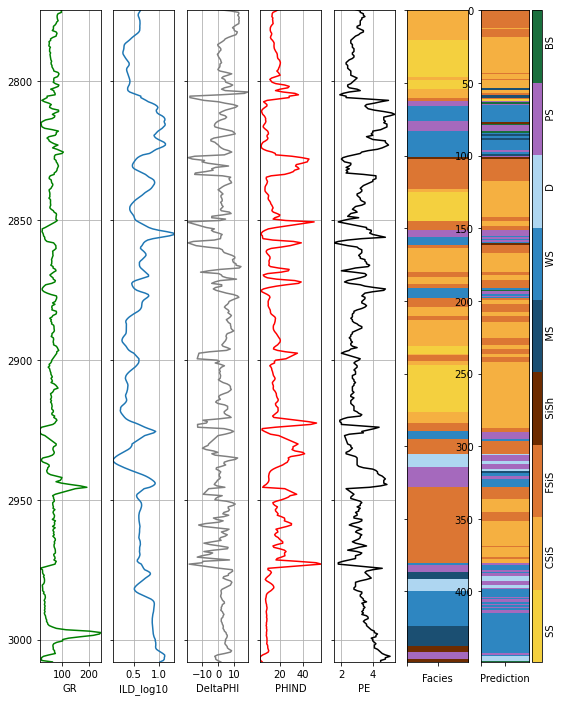

In [ ]:
compare_facies_plot(blind, 'Prediction', facies_colours)

In [ ]:
# Save model as pickle file

import pickle

pickle_out = open("classifier.pkl", "wb")

pickle.dump(d_tree_model_norm, pickle_out)
pickle_out.close()